In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm 
import pylab as py
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [243]:
cylinder = pd.read_csv('Cylinder_band.csv')
cylinder.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,press_type,press,unit_number,cylinder_size,paper_mill_location,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humifity,roughness,blade_pressure,varnish_pct,press_speed,ink_pct,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,x126,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,northus,1911,55,46,0.2,17,78,0.75,20,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,x266,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,northus,?,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,b7,modmat,47201,yes,key,yes,benton,gallatin,uncoated,coated,no,line,yes,woodhoe70,815,9,catalog,northus,?,62,40,0.433,16,80,?,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,t133,massey,39039,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,woodhoe70,816,9,catalog,northus,1910,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,j34,kmart,37351,no,key,yes,benton,gallatin,uncoated,coated,no,line,yes,woodhoe70,816,2,tabloid,?,1910,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [244]:
cylinder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 40 columns):
timestamp              540 non-null int64
cylinder_number        540 non-null object
customer               540 non-null object
job_number             540 non-null int64
grain_screened         540 non-null object
ink_color              540 non-null object
proof_on_ctd_ink       540 non-null object
blade_mfg              540 non-null object
cylinder_division      540 non-null object
paper_type             540 non-null object
ink_type               540 non-null object
direct_steam           540 non-null object
solvent_type           540 non-null object
type_on_cylinder       540 non-null object
press_type             540 non-null object
press                  540 non-null int64
unit_number            540 non-null int64
cylinder_size          540 non-null object
paper_mill_location    540 non-null object
plating_tank           540 non-null object
proof_cut              540 non-null obj

In [245]:
cylinder1 = cylinder.replace('?',np.nan)
cylinder1

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,blade_mfg,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,press_type,press,unit_number,cylinder_size,paper_mill_location,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humifity,roughness,blade_pressure,varnish_pct,press_speed,ink_pct,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,x126,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,northus,1911,55,46,0.2,17,78,0.75,20,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,x266,tvguide,25503,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,northus,NaN,55,46,0.3,15,80,0.75,20,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,b7,modmat,47201,yes,key,yes,benton,gallatin,uncoated,coated,no,line,yes,woodhoe70,815,9,catalog,northus,NaN,62,40,0.433,16,80,NaN,30,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,t133,massey,39039,yes,key,yes,benton,gallatin,uncoated,uncoated,no,line,yes,woodhoe70,816,9,catalog,northus,1910,52,40,0.3,16,75,0.3125,30,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,j34,kmart,37351,no,key,yes,benton,gallatin,uncoated,coated,no,line,yes,woodhoe70,816,2,tabloid,NaN,1910,50,46,0.3,17,80,0.75,30,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,19941005,aa66,kmart,85813,NaN,key,NaN,NaN,gallatin,super,uncoated,NaN,NaN,NaN,motter94,827,9,tabloid,NaN,1910,NaN,52,NaN,18,82,1,25,NaN,1880,NaN,NaN,NaN,NaN,1,1,NaN,40,112.5,100,band
536,19941009,j44,best,38064,NaN,key,NaN,NaN,gallatin,super,coated,NaN,NaN,yes,albert70,815,1,tabloid,NaN,1910,NaN,NaN,0.200,16.1,76,0.500,34,NaN,2100,NaN,NaN,NaN,NaN,0,0,NaN,40,110,100,band
537,19941009,aa58,kmart,85814,NaN,key,NaN,NaN,gallatin,super,coated,NaN,NaN,NaN,motter94,827,2,tabloid,NaN,1910,NaN,NaN,0.300,16.5,70,1,34,NaN,1903,NaN,NaN,NaN,NaN,2.7,2.8,NaN,40,108,100,band
538,19941010,aa70,kmart,85814,NaN,key,NaN,NaN,gallatin,super,uncoated,NaN,NaN,NaN,motter94,828,2,tabloid,NaN,1910,NaN,46,0.267,16.4,76,1,34,NaN,1903,NaN,NaN,NaN,NaN,1.5,2.3,NaN,40,108,100,band


In [246]:
cylinder1.isnull().sum()

timestamp                0
cylinder_number          0
customer                 0
job_number               0
grain_screened          49
ink_color                0
proof_on_ctd_ink        57
blade_mfg               60
cylinder_division        0
paper_type               0
ink_type                 0
direct_steam            25
solvent_type            55
type_on_cylinder        18
press_type               0
press                    0
unit_number              0
cylinder_size            3
paper_mill_location    156
plating_tank            18
proof_cut               55
viscosity                5
caliper                 27
ink_temperature          2
humifity                 1
roughness               30
blade_pressure          63
varnish_pct             56
press_speed             10
ink_pct                 56
solvent_pct             56
ESA_Voltage             57
ESA_Amperage            55
wax                      6
hardener                 7
roller_durometer        55
current_density          7
a

In [0]:
#blade_mfg, paper_mill_location and  blade_pressure
#I find these variable with more tha 60 missing values so we drop these.

In [365]:
c1 = cylinder1.drop(['blade_mfg', 'paper_mill_location','blade_pressure'], axis= 1)
c1.head()

,timestamp,cylinder_number,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,press_type,press,unit_number,cylinder_size,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humifity,roughness,varnish_pct,press_speed,ink_pct,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,x126,tvguide,25503,yes,key,yes,gallatin,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,1911,55,46,0.2,17,78,0.75,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band
1,19910109,x266,tvguide,25503,yes,key,yes,gallatin,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,NaN,55,46,0.3,15,80,0.75,6.6,1900,54.9,38.5,0,0,2.5,0.7,34,40,105,100,noband
2,19910104,b7,modmat,47201,yes,key,yes,gallatin,uncoated,coated,no,line,yes,woodhoe70,815,9,catalog,NaN,62,40,0.433,16,80,NaN,6.5,1850,53.8,39.8,0,0,2.8,0.9,40,40,103.87,100,noband
3,19910104,t133,massey,39039,yes,key,yes,gallatin,uncoated,uncoated,no,line,yes,woodhoe70,816,9,catalog,1910,52,40,0.3,16,75,0.3125,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,j34,kmart,37351,no,key,yes,gallatin,uncoated,coated,no,line,yes,woodhoe70,816,2,tabloid,1910,50,46,0.3,17,80,0.75,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband


In [366]:
c1.isna().sum()

timestamp             0
cylinder_number       0
customer              0
job_number            0
grain_screened       49
ink_color             0
proof_on_ctd_ink     57
cylinder_division     0
paper_type            0
ink_type              0
direct_steam         25
solvent_type         55
type_on_cylinder     18
press_type            0
press                 0
unit_number           0
cylinder_size         3
plating_tank         18
proof_cut            55
viscosity             5
caliper              27
ink_temperature       2
humifity              1
roughness            30
varnish_pct          56
press_speed          10
ink_pct              56
solvent_pct          56
ESA_Voltage          57
ESA_Amperage         55
wax                   6
hardener              7
roller_durometer     55
current_density       7
anode_space_ratio     7
chrome_content        3
band_type             0
dtype: int64

In [367]:
c2 = c1.dropna()
c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 484
Data columns (total 37 columns):
timestamp            398 non-null int64
cylinder_number      398 non-null object
customer             398 non-null object
job_number           398 non-null int64
grain_screened       398 non-null object
ink_color            398 non-null object
proof_on_ctd_ink     398 non-null object
cylinder_division    398 non-null object
paper_type           398 non-null object
ink_type             398 non-null object
direct_steam         398 non-null object
solvent_type         398 non-null object
type_on_cylinder     398 non-null object
press_type           398 non-null object
press                398 non-null int64
unit_number          398 non-null int64
cylinder_size        398 non-null object
plating_tank         398 non-null object
proof_cut            398 non-null object
viscosity            398 non-null object
caliper              398 non-null object
ink_temperature      398 non-null obje

In [368]:
c2.isna().sum()

timestamp            0
cylinder_number      0
customer             0
job_number           0
grain_screened       0
ink_color            0
proof_on_ctd_ink     0
cylinder_division    0
paper_type           0
ink_type             0
direct_steam         0
solvent_type         0
type_on_cylinder     0
press_type           0
press                0
unit_number          0
cylinder_size        0
plating_tank         0
proof_cut            0
viscosity            0
caliper              0
ink_temperature      0
humifity             0
roughness            0
varnish_pct          0
press_speed          0
ink_pct              0
solvent_pct          0
ESA_Voltage          0
ESA_Amperage         0
wax                  0
hardener             0
roller_durometer     0
current_density      0
anode_space_ratio    0
chrome_content       0
band_type            0
dtype: int64

In [369]:
#As cylinder number is an identifier and should be ignored when modeling the data
#We will drop cylinder_number.value
c_new = c2.drop(['cylinder_number'], axis =1)
c_new.head()

,timestamp,customer,job_number,grain_screened,ink_color,proof_on_ctd_ink,cylinder_division,paper_type,ink_type,direct_steam,solvent_type,type_on_cylinder,press_type,press,unit_number,cylinder_size,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humifity,roughness,varnish_pct,press_speed,ink_pct,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type
0,19910108,tvguide,25503,yes,key,yes,gallatin,uncoated,uncoated,no,line,yes,motter94,821,2,tabloid,1911,55,46,0.2,17,78,0.75,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band
3,19910104,massey,39039,yes,key,yes,gallatin,uncoated,uncoated,no,line,yes,woodhoe70,816,9,catalog,1910,52,40,0.3,16,75,0.3125,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
4,19910111,kmart,37351,no,key,yes,gallatin,uncoated,coated,no,line,yes,woodhoe70,816,2,tabloid,1910,50,46,0.3,17,80,0.75,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband
5,19910104,massey,38039,yes,key,yes,gallatin,uncoated,uncoated,no,line,yes,woodhoe70,816,2,catalog,1910,50,40,0.267,16.8,76,0.4375,8.6,1467,53.8,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
6,19910111,roses,35751,no,key,yes,gallatin,coated,coated,no,line,yes,motter94,827,2,tabloid,1911,50,46,0.3,16.5,75,0.75,0,2600,62.5,37.5,6,0,2.5,0.6,30,40,106.67,100,noband


In [0]:
#As our target value is Band Type. Lets see the different parameters affecting target variable.

In [370]:
c_new.describe()

,timestamp,job_number,press,unit_number
count,3.980000e+02,398.000000,398.000000,398.000000
mean,1.990562e+07,36525.638191,817.422111,5.027638
std,5.091589e+03,6562.418919,7.606686,3.262139
min,1.990041e+07,23048.000000,802.000000,1.000000
25%,1.990082e+07,34588.500000,815.000000,2.000000
50%,1.990122e+07,36165.500000,816.000000,5.000000
75%,1.991042e+07,37501.000000,824.000000,9.000000
max,1.992022e+07,88231.000000,828.000000,10.000000


#Variable Visualisation

Text(0.5, 1.0, 'Histogram of timestamp')

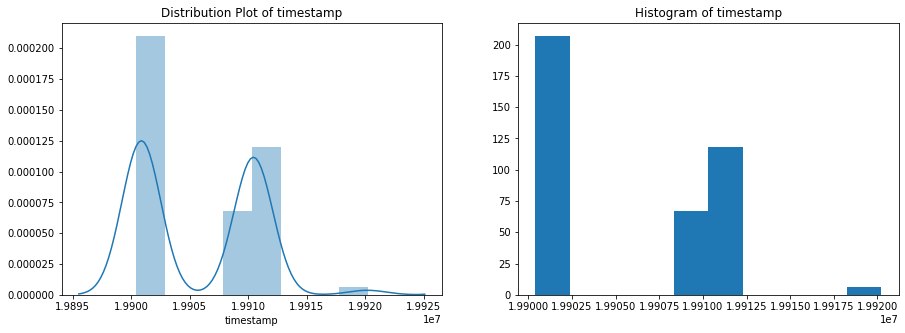

In [371]:
#timestamp
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(c_new['timestamp'])
plt.title('Distribution Plot of timestamp')

plt.subplot(1,2,2)
plt.hist(c_new['timestamp'])
plt.title('Histogram of timestamp')

Text(0.5, 1.0, 'Histogram of job_number')

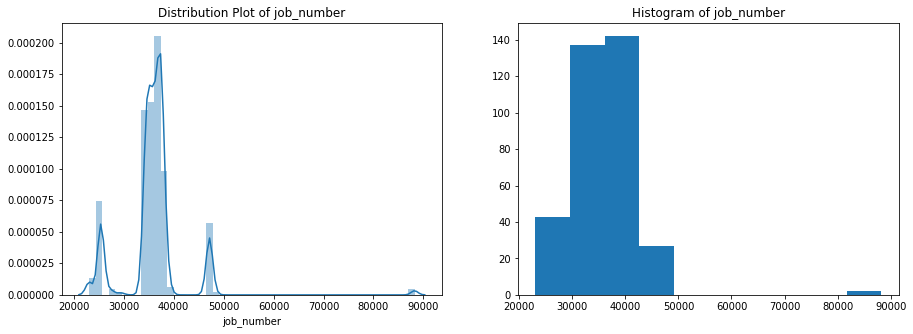

In [256]:
#timestamp
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(c_new['job_number'])
plt.title('Distribution Plot of job_number')

plt.subplot(1,2,2)
plt.hist(c_new['job_number'])
plt.title('Histogram of job_number')

Text(0.5, 1.0, 'Histogram of press')

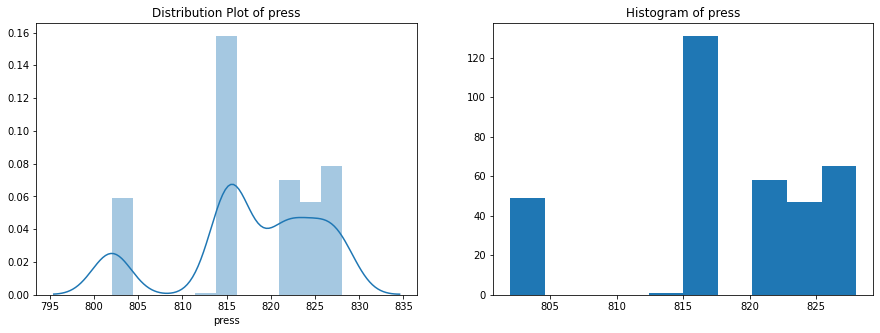

In [257]:
#press
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(c_new['press'])
plt.title('Distribution Plot of press')

plt.subplot(1,2,2)
plt.hist(c_new['press'])
plt.title('Histogram of press')

Text(0.5, 1.0, 'Histogram of unit_number')

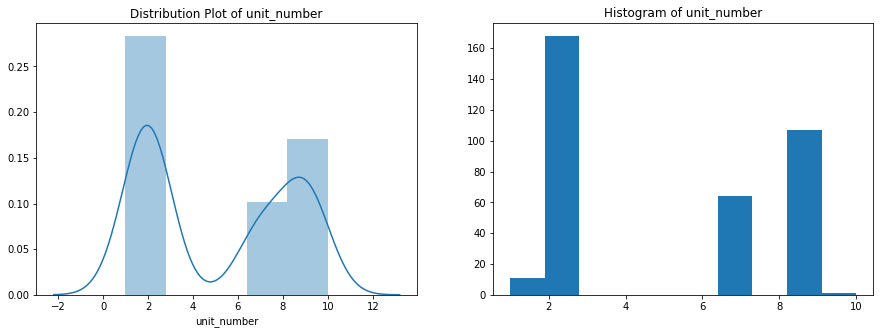

In [258]:
#unit_number
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(c_new['unit_number'])
plt.title('Distribution Plot of unit_number')

plt.subplot(1,2,2)
plt.hist(c_new['unit_number'])
plt.title('Histogram of unit_number')

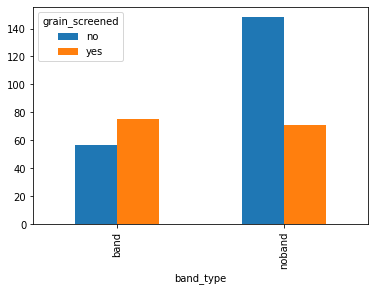

In [345]:
gs= pd.crosstab(c_new.band_type,c_new.grain_screened)
gs.plot.bar(stacked=False)

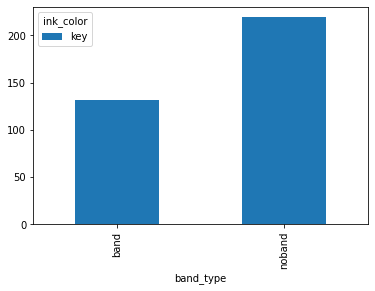

In [260]:
ic= pd.crosstab(c_new.band_type,c_new.ink_color)
ic.plot.bar(stacked=False)

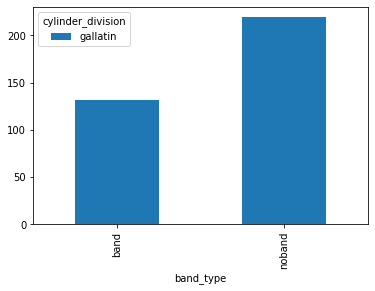

In [261]:
cd= pd.crosstab(c_new.band_type,c_new.cylinder_division)
cd.plot.bar(stacked=False)

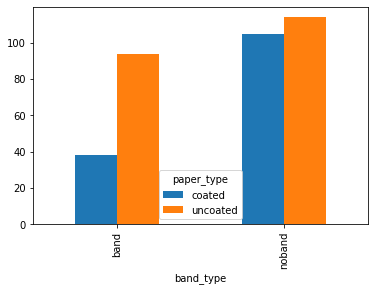

In [262]:
pd= pd.crosstab(c_new.band_type,c_new.paper_type)
pd.plot.bar(stacked=False)

Text(0.5, 1.0, 'Boxplot of timestamp')

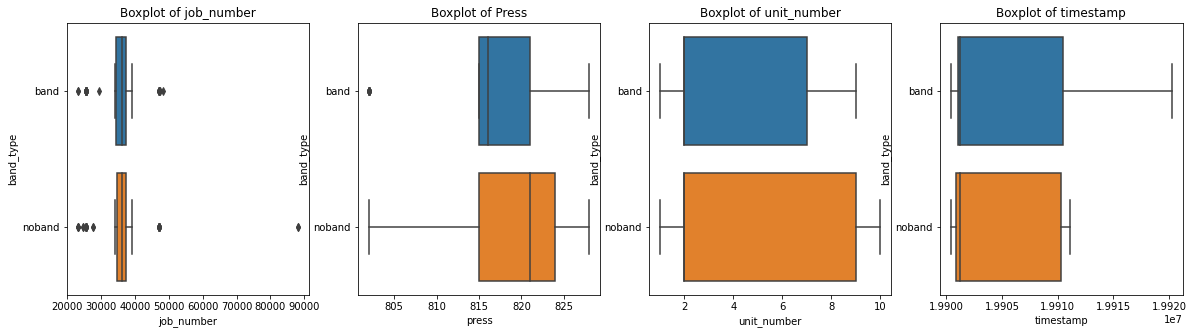

In [263]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
sns.boxplot(x = "job_number", y= "band_type", data=c_new)
plt.title('Boxplot of job_number')

plt.subplot(1,4,2)
sns.boxplot(x = "press", y= "band_type", data=c_new)
plt.title('Boxplot of Press')

plt.subplot(1,4,3)
sns.boxplot(x = "unit_number", y= "band_type", data=c_new)
plt.title('Boxplot of unit_number')

plt.subplot(1,4,4)
sns.boxplot(x = "timestamp", y= "band_type", data=c_new)
plt.title('Boxplot of timestamp')

#Running Different Statistical Test On the Variables

In [351]:
j1=pd.crosstab(c_new.band_type,c_new.customer)
stats.chi2_contingency(j1)

(102.35771413449756,
 0.0002144875427062442,
 57,
 array([[ 0.75213675,  0.75213675,  0.37606838,  7.14529915,  2.25641026,
          1.5042735 ,  0.75213675,  2.25641026,  0.75213675,  0.75213675,
          0.75213675,  0.75213675,  0.75213675,  2.63247863,  0.75213675,
          0.75213675,  1.12820513,  1.5042735 ,  0.75213675,  3.00854701,
          1.12820513,  0.37606838,  0.37606838,  0.37606838,  1.5042735 ,
          0.75213675,  0.75213675,  0.75213675,  0.75213675,  0.75213675,
          0.37606838,  2.63247863,  0.75213675,  0.37606838,  1.12820513,
          0.75213675,  0.37606838, 16.17094017,  0.75213675,  1.12820513,
          2.25641026,  0.75213675,  9.77777778,  1.12820513,  0.75213675,
          1.88034188,  5.26495726,  1.5042735 ,  2.25641026,  9.77777778,
          6.39316239, 12.03418803,  1.5042735 ,  2.25641026,  9.4017094 ,
          2.25641026,  0.37606838,  0.37606838],
        [ 1.24786325,  1.24786325,  0.62393162, 11.85470085,  3.74358974,
          2.4

In [352]:
j2=pd.crosstab(c_new.band_type,c_new.grain_screened)
stats.chi2_contingency(j2)

(19.18861157301865,
 1.1841775588566321e-05,
 1,
 array([[ 77.09401709,  54.90598291],
        [127.90598291,  91.09401709]]))

In [353]:
j3=pd.crosstab(c_new.band_type,c_new.ink_color)
stats.chi2_contingency(j3)

(0.0, 1.0, 0, array([[132.],
        [219.]]))

In [354]:
j4=pd.crosstab(c_new.band_type,c_new.proof_on_ctd_ink)
stats.chi2_contingency(j4)

(2.667335961428428, 0.1024273441245007, 1, array([[  6.76923077, 125.23076923],
        [ 11.23076923, 207.76923077]]))

In [355]:
j5=pd.crosstab(c_new.band_type,c_new.cylinder_division)
stats.chi2_contingency(j5)

(0.0, 1.0, 0, array([[132.],
        [219.]]))

In [356]:
j6=pd.crosstab(c_new.band_type,c_new.paper_type)
stats.chi2_contingency(j6)

(11.73881635273972,
 0.0006120993976364516,
 1,
 array([[ 53.77777778,  78.22222222],
        [ 89.22222222, 129.77777778]]))

In [357]:
j7=pd.crosstab(c_new.band_type,c_new.ink_type)
stats.chi2_contingency(j7)

(29.74095984128396,
 3.4820309515322965e-07,
 2,
 array([[ 72.20512821,   4.51282051,  55.28205128],
        [119.79487179,   7.48717949,  91.71794872]]))

In [358]:
j8=pd.crosstab(c_new.band_type,c_new.cylinder_division)
stats.chi2_contingency(j8)

(0.0, 1.0, 0, array([[132.],
        [219.]]))

In [359]:
j9=pd.crosstab(c_new.band_type,c_new.direct_steam)
stats.chi2_contingency(j9)

(0.06564468066180391,
 0.7977870049593123,
 1,
 array([[131.62393162,   0.37606838],
        [218.37606838,   0.62393162]]))

In [360]:
j10=pd.crosstab(c_new.band_type,c_new.solvent_type)
stats.chi2_contingency(j10)

(2.4504990476888135,
 0.29368440991705624,
 2,
 array([[127.86324786,   0.75213675,   3.38461538],
        [212.13675214,   1.24786325,   5.61538462]]))

In [361]:
j11=pd.crosstab(c_new.band_type,c_new.type_on_cylinder)
stats.chi2_contingency(j11)

(4.917277457623978,
 0.026589386200843206,
 1,
 array([[ 42.11965812,  89.88034188],
        [ 69.88034188, 149.11965812]]))

In [362]:
j12=pd.crosstab(c_new.band_type,c_new.press_type)
stats.chi2_contingency(j12)

(20.658217020611826,
 0.00012396099611216668,
 3,
 array([[ 18.42735043,   0.37606838,  63.93162393,  49.26495726],
        [ 30.57264957,   0.62393162, 106.06837607,  81.73504274]]))

In [363]:
j13=pd.crosstab(c_new.band_type,c_new.cylinder_size)
stats.chi2_contingency(j13)

(1.1941073248047096,
 0.5504310048835845,
 2,
 array([[ 36.1025641 ,  13.16239316,  82.73504274],
        [ 59.8974359 ,  21.83760684, 137.26495726]]))

#Dummy Variable



In [372]:
import pandas as pd
c_dummy= pd.get_dummies(c_new, columns=['grain_screened','ink_color','proof_on_ctd_ink','cylinder_division','paper_type','ink_type','direct_steam','solvent_type','type_on_cylinder','press_type','customer','cylinder_size'],drop_first=True)
c_dummy.head()

,timestamp,job_number,press,unit_number,plating_tank,proof_cut,viscosity,caliper,ink_temperature,humifity,roughness,varnish_pct,press_speed,ink_pct,solvent_pct,ESA_Voltage,ESA_Amperage,wax,hardener,roller_durometer,current_density,anode_space_ratio,chrome_content,band_type,grain_screened_yes,proof_on_ctd_ink_yes,paper_type_uncoated,ink_type_cover,ink_type_uncoated,direct_steam_yes,solvent_type_naptha,solvent_type_xylol,type_on_cylinder_yes,press_type_motter70,press_type_motter94,press_type_woodhoe70,customer_abbeypress,customer_abbypress,customer_adco,customer_ames,...,customer_eckerds,customer_exxon,customer_global,customer_globalequp,customer_guideposts,customer_gurney,customer_hanhouse,customer_hanoverhouse,customer_hanoverhse,customer_hanovrhous,customer_hanovrhouse,customer_hills,customer_homeshopping,customer_jamesway,customer_jcp,customer_jcpenny,customer_kidsrus,customer_kmart,customer_lazarus,customer_lurias,customer_massey,customer_mervyns,customer_modmat,customer_natlwildlife,customer_oldvillageshop,customer_rei,customer_roses,customer_sears,customer_sheplers,customer_target,customer_toysrus,customer_tvguide,customer_uscav,customer_walmart,customer_wards,customer_woolworth,customer_woolwrth,customer_yieldhouse,cylinder_size_spiegel,cylinder_size_tabloid
0,19910108,25503,821,2,1911,55,46,0.2,17,78,0.75,13.1,1700,50.5,36.4,0,0,2.5,1,34,40,105,100,band,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,19910104,39039,816,9,1910,52,40,0.3,16,75,0.3125,5.6,1467,55.6,38.8,0,0,2.5,1.3,40,40,108.06,100,noband,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19910111,37351,816,2,1910,50,46,0.3,17,80,0.75,0,2100,57.5,42.5,5,0,2.3,0.6,35,40,106.67,100,noband,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,19910104,38039,816,2,1910,50,40,0.267,16.8,76,0.4375,8.6,1467,53.8,37.6,5,0,2.5,0.8,40,40,103.87,100,noband,1,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19910111,35751,827,2,1911,50,46,0.3,16.5,75,0.75,0,2600,62.5,37.5,6,0,2.5,0.6,30,40,106.67,100,noband,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


#Splitting Dataset to Train & Test

In [0]:
x = c_dummy.drop(['band_type'], axis= 1)
y = c_dummy['band_type']

In [374]:
from sklearn.model_selection import train_test_split
  # 80 % go into the training test, 20% in the validation test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 95)
(80, 95)
(318,)
(80,)


#Logistic Regression Model on Dummy Variable Dataset

In [375]:
#Now we will perform Logistic Regression Model on the Dummy Variable Dataset

#Importing Logistic Regression Model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [376]:
#y prediction
y_pred = logreg.predict(x_test)
y_pred

array(['noband', 'noband', 'noband', 'noband', 'band', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'band', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband'],
      dtype=object)

In [377]:
#logistic regression prediction
log_predicted= logreg.predict(x_test)
log_predicted

array(['noband', 'noband', 'noband', 'noband', 'band', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'band', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband',
       'noband', 'noband', 'noband', 'noband', 'noband', 'noband'],
      dtype=object)

In [378]:
#Now we import Classification report confusion matrix from sklearn to check the accuracy of the prediction we made with logisitic regession model 
from sklearn.metrics import classification_report,confusion_matrix

print('Classification Report: \n', classification_report(y_test,log_predicted))

Classification Report: 
               precision    recall  f1-score   support

        band       0.50      0.04      0.07        26
      noband       0.68      0.98      0.80        54

    accuracy                           0.68        80
   macro avg       0.59      0.51      0.44        80
weighted avg       0.62      0.68      0.57        80



In [379]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,log_predicted)
print('Accuracy: \n', Accuracy)
print('Accuracy:\n', 100*(Accuracy))

Accuracy: 
 0.675
Accuracy:
 67.5


#Decision Tree of Dummy Variable Dataset


In [380]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=105)

dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=105, splitter='best')

In [381]:
#Decision Tree Predction
D_pred =dtree.predict(x_test)

#Now we import Classification report confusion matrix from sklearn to check the accuracy of the prediction we made with Decision Tree Classifier Model
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,D_pred))

Classification Report: 
               precision    recall  f1-score   support

        band       0.70      0.73      0.72        26
      noband       0.87      0.85      0.86        54

    accuracy                           0.81        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.81      0.81      0.81        80



In [383]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,D_pred)
print('Accuracy: \n', Accuracy)
print('Accuracy:\n', 100*(Accuracy))

Accuracy: 
 0.8125
Accuracy:
 81.25


#Random Forest of Decision Tree

In [384]:
#Now we will perform Random Forest of Decision Tree Model on the Dummy Variable Dataset

#importing Random Forest Classifier Model

from sklearn.ensemble import RandomForestClassifier
rforrest = RandomForestClassifier(random_state=105)

rforrest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=105,
                       verbose=0, warm_start=False)

In [385]:
#Random Forest Classifier Predction
R_pred = rforrest.predict(x_test)

#Now we import Classification report confusion matrix from sklearn to check the accuracy of the prediction we made with Random Forest Classifier Model
from sklearn.metrics import classification_report,confusion_matrix
print('Classification Report: \n', classification_report(y_test,R_pred))

Classification Report: 
               precision    recall  f1-score   support

        band       0.85      0.42      0.56        26
      noband       0.78      0.96      0.86        54

    accuracy                           0.79        80
   macro avg       0.81      0.69      0.71        80
weighted avg       0.80      0.79      0.76        80



In [386]:
from sklearn.metrics import accuracy_score
Accuracy = accuracy_score(y_test,R_pred)
print('Accuracy: \n', Accuracy)
print('Accuracy:\n', 100*(Accuracy))

Accuracy: 
 0.7875
Accuracy:
 78.75
